# Analise de dente

In [1]:
%matplotlib inline
import numpy as np 
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d

In [2]:
fossil_path = 'teeth_image.tif'
fossil_data = imread(fossil_path)

print('Loading Fossil Data sized {}'.format(fossil_data.shape))

Loading Fossil Data sized (176, 314, 314)


Text(0.5, 1.0, 'Slice Histogram')

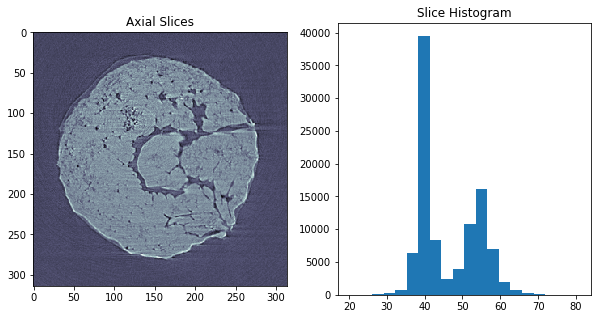

In [3]:
slice_idx = int(fossil_data.shape[0]/2)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(fossil_data[slice_idx], cmap = 'bone')
ax1.set_title('Axial Slices')
_ = ax2.hist(fossil_data[slice_idx].ravel(), 20)
ax2.set_title('Slice Histogram')

Text(0.5, 1.0, 'Filtered Slice')

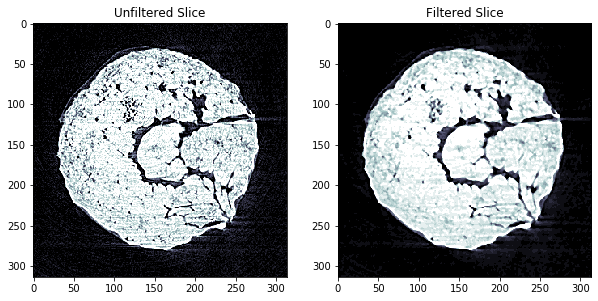

In [4]:
from scipy.ndimage.filters import median_filter
# filter the data
filter_fossil_data = median_filter(fossil_data, (3,3,3))

# setup the plot
slice_idx = int(fossil_data.shape[0]/2)
test_slice = fossil_data[slice_idx]
test_filt_slice = filter_fossil_data[slice_idx]
# setup the default image arguments
im_args = dict(cmap = 'bone', vmin = 40, vmax = 55)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.imshow(test_slice, **im_args)
ax1.set_title('Unfiltered Slice')
_ = ax2.imshow(test_filt_slice, **im_args)
ax2.set_title('Filtered Slice')

(-0.5, 2511.5, 1407.5, -0.5)

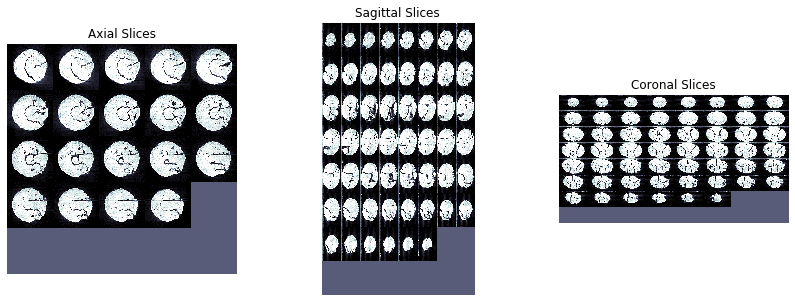

In [5]:
skip_border = 50
skip_middle = 4
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 5))
ax1.imshow(montage2d(filter_fossil_data[skip_border:-skip_border:skip_middle]),**im_args)
ax1.set_title('Axial Slices')
ax1.axis('off')

ax2.imshow(montage2d(filter_fossil_data.transpose(1,2,0)[skip_border:-skip_border:skip_middle]), **im_args)
ax2.set_title('Sagittal Slices')
ax2.axis('off')

ax3.imshow(montage2d(filter_fossil_data.transpose(2,0,1)[skip_border:-skip_border:skip_middle]), **im_args)
ax3.set_title('Coronal Slices')
ax3.axis('off')

Text(0.5, 1.0, 'Slice with Threshold')

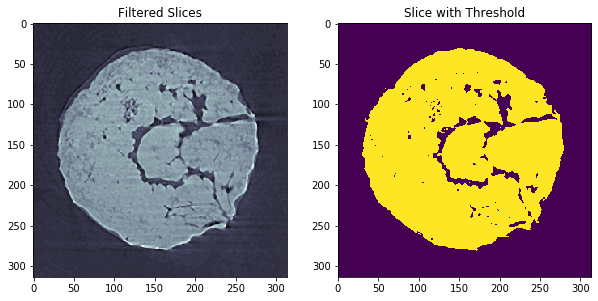

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
thresh_fossil_data = filter_fossil_data > 45
thresh_slice = thresh_fossil_data[slice_idx]
ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(thresh_slice)
ax2.set_title('Slice with Threshold')

Text(0.5, 1.0, 'Slice After Closing')

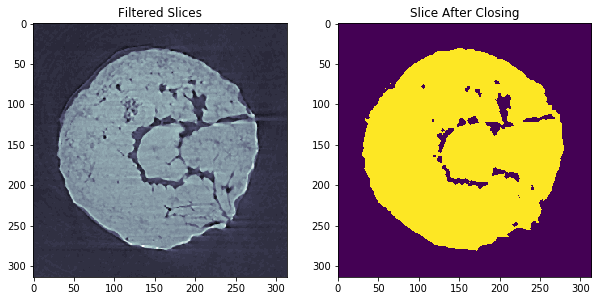

In [7]:
from skimage.morphology import binary_closing, ball
closed_fossil_data = binary_closing(thresh_fossil_data, ball(2))
close_slice = closed_fossil_data[slice_idx]
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))

ax1.imshow(test_filt_slice, cmap = 'bone')
ax1.set_title('Filtered Slices')
_ = ax2.imshow(close_slice)
ax2.set_title('Slice After Closing')

In [8]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure
def show_3d_mesh(p, threshold):
    verts, faces, _, _ = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.9, edgecolor='none', linewidth = 0.1)
    mesh.set_facecolor([.1, 1, .1])
    mesh.set_edgecolor([1, 0, 0])
    
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    ax.view_init(45, 45)
    return fig

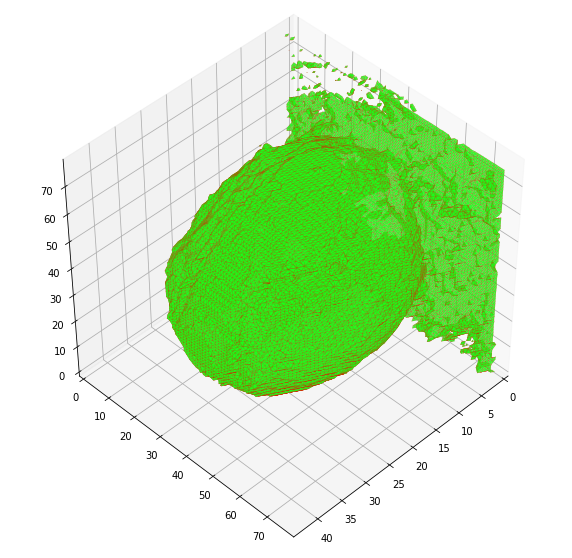

In [9]:
from scipy.ndimage import zoom
# we downsample the image to make 3d rendering quicker
fossil_downscale = zoom(closed_fossil_data.astype(np.float32), 0.25)
# now we display it with a nice mesh
_ = show_3d_mesh(fossil_downscale, 0.5)